# **Músicas mais tocadas Spotify 2023**

Este conjunto de dados trás comparações entre as músicas mais tocadas na plataforma do Spotify, trazendo dados sobre a sua popularidade e presença em outras plataformas dentre outros aspectos como nome da faixa, nome do(s) artista(s), data de lançamento, listas de reprodução e paradas do Spotify, estatísticas de streaming, presença da Apple Music, presença do Deezer, Shazam Charts e vários recursos de áudio.

# Variáveis:
* **track_name:** Nome da música (String)
* **artist(s)_name:** Nome do artista (String)
* **artist_count:** Quantidade de artistas presentes na produção (Int)
* **released_year:** Ano de Lançamento da música (Int)
* **in_spotify_playlists:** Quantidade de playlists em que a música está presente no Spotify (Int)
* **in_spotify_charts:** Presença e ranking da música nas paradas do Spotify (Int)
* **streams:** Número de transmissões na plataforma do Spotify (String)
* **in_apple_playlists:** Número de playlists em que a música está incluida no Apple Music (Int)
* **in_apple_charts:** Presença e ranking da música nas paradas da Apple Music (Int)
* **in_deezer_playlists:** Número de playlists em que a música está incluida no Deezer (Int)
* **in_deezer_charts:** Presença e ranking da música nas pardas do Deezer (Int)
* **in_shazam_charts:** Presença e ranking da música nas paradas do Shazam (Int)
* **bpm:** As batidas por segundo da música (Int)
* **key:** O tom no qual a música foi feita (String)
* **mode:** Se a música foi feita em maior ou menor (String)
* **danceability_%:** Porcentagem da música em que se tem vontade de dançar (Float)
* **valence_%:** Porcentagem da música em que se produz uma sensação positiva (Float)
* **acousticness_%:** Porcentagem da música em que está presente um som acústico (Float)
* **instrumentalness_%:** Porcentagem de momentos instrumentais na música (Float)

## Objetivos da análise:


1.   Encontrar os artistas e as músicas mais populares
2.   Verificar comportamentos em cada plataforma


# Conhecendo os dados

In [51]:
# Importar bibliotecas
import numpy as np # biblioteca para computação científica, cálculos
import pandas as pd # biblioteca para processamento de dados
import matplotlib.pyplot as plt # plotagem de gráficos, como linhas, barras, dispersão
import seaborn as sns # criação de gráficos estatísticos e visualizações mais complexas
from matplotlib.colors import ListedColormap #Atribuição de lista de cores

In [52]:
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [53]:
# Modelos
from sklearn.neighbors import KNeighborsRegressor # KNN
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import KNeighborsClassifier # Para redução de dimensionalidade
from sklearn.decomposition import PCA 

from sklearn.tree import DecisionTreeRegressor # Floresta Aleatória

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split # Divisão de dados e validação

from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score # Métricas

In [54]:
# Ler dados
dados = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='latin1')
# Usando 'latin1', aparentemente o arquivo contém caracteres especiais que não são interpretados pela codificação padrão

In [55]:
# Exibir as primeiras linhas do dataframe
dados.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [56]:
# Informações sobre os dados coletados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Pré-processamento

In [57]:
# Selecionar colunas para remover
colunas_para_remover = [
    'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
    'energy_%', 'acousticness_%', 'instrumentalness_%',
    'liveness_%', 'speechiness_%', 'in_shazam_charts'
]

# Remover as colunas
dados = dados.drop(columns=colunas_para_remover)

In [58]:
# Visualizar o dataframe após remover as colunas
dados.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15


In [59]:
# Verificar quais valores na coluna 'streams' não são numéricos
nao_numericos = dados[~dados['streams'].str.isnumeric()]
print(nao_numericos)

                              track_name     artist(s)_name  artist_count  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   

     released_year  released_month  released_day  in_spotify_playlists  \
574           1970               1             1                  2877   

     in_spotify_charts                                            streams  \
574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   

     in_apple_playlists  in_apple_charts in_deezer_playlists  in_deezer_charts  
574                  16                0                  54                 0  


In [60]:
# Remover linha 574
dados = dados.drop(574)

# Converter 'streams' para int
dados['streams'] = dados['streams'].astype(int)

In [61]:
# Verificar quais valores na coluna 'in_deezer_plylists' não são numéricos
nao_numericos = dados[~dados['in_deezer_playlists'].str.isnumeric()]
print(nao_numericos)

              track_name         artist(s)_name  artist_count  released_year  \
48               Starboy  The Weeknd, Daft Punk             2           2016   
54          Another Love              Tom Odell             1           2012   
55       Blinding Lights             The Weeknd             1           2019   
65                Yellow          Chris Molitor             1           1999   
73       Sweater Weather      The Neighbourhood             1           2012   
..                   ...                    ...           ...            ...   
761           Photograph             Ed Sheeran             1           2014   
762        Love Yourself          Justin Bieber             1           2015   
871  Sweet Child O' Mine          Guns N' Roses             1           1987   
893            Heartless             Kanye West             1           2008   
910        The Scientist               Coldplay             1           2002   

     released_month  released_day  in_s

Os números na coluna 'in_deezer_playlists' estão sendo apresentados com uma vírgula, diferente dos demais.

In [62]:
# Remover a vírgula e converter para int
dados['in_deezer_playlists'] = dados['in_deezer_playlists'].str.replace(',', '').astype(int)

In [63]:
# Informações sobre os dados depois das conversões de tipo
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 104.1+ KB


In [64]:
# Contar o número de linhas duplicadas
numero_de_linhas_duplicadas = dados.duplicated().sum()
print(f"Número de linhas duplicadas: {numero_de_linhas_duplicadas}")

Número de linhas duplicadas: 0


Antes de iniciar a análise, é necessário examinar as linhas que estão com problemas (caracteres especiais):

In [65]:
# Identificar linhas com caracteres que fogem do padrão
linhas_com_problema = dados[dados.astype(str).apply(lambda row: row.str.contains(r'[^\x00-\x7F]', regex=True).any(), axis=1)]

In [66]:
# Contar o número de linhas com problemas
numero_de_linhas_com_problema = len(linhas_com_problema)

print(f"Número de linhas com problemas: {numero_de_linhas_com_problema}")

Número de linhas com problemas: 109


In [67]:
# Filtrar apenas as colunas "track_name" e "artist(s)_name"
colunas_selecionadas = linhas_com_problema[['track_name', 'artist(s)_name']]

# Exibir todas as linhas das colunas selecionadas
with pd.option_context('display.max_rows', None):
    print(colunas_selecionadas)

                                            track_name  \
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
26                       Calm Down (with Selena Gomez)   
36                      Frï¿½ï¿½gil (feat. Grupo Front   
60                                              Tï¿½ï¿   
63                                                BESO   
79                                     CORAZï¿½ï¿½N VA   
82                                   Novidade na ï¿½ï¿   
93                                    Donï¿½ï¿½ï¿½t Bl   
112                                            LAGUNAS   
118                                          VAGABUNDO   
125                           Feliz Cumpleaï¿½ï¿½os Fe   
141                                      Novo Balanï¿½   
146                                      Ojitos Lindos   
174                                       ýýýýýýýýýýýý   
191            You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve   
192                                  Titi Me Preguntï¿   
202           

In [68]:
# Dicionário de substituições para corrigir caracteres corrompidos
substituicoes = {
    "Marï¿½ï¿½lia Mendonï¿½ï¿½a": "Marília Mendonça",
    "Marï¿½ï¿½lia": "Marília",
    "Matuï¿½ï¿½": "Matuê",
    "Luï¿½ï¿½sa Sonza": "Luíza Sonza",
    "Zï¿½ï¿½": "Zé",
    "Beyoncï¿": "Beyoncé",
    "Tiï¿½ï¿½sto": "Tiesto",
    "Estï¿½ï¿½reo": "Estéreo",
    "Frï¿½ï¿½gil": "Frágil",
    "Schï¿½ï¿½rze": "Schürze",
    "ROSALï¿½": "ROSALIA",
    "Rï¿½ï¿½ma": "Rema",
    "Cumpleaï¿½ï¿½os": "Cumpleaños",
    "INGLï¿½": "INGLÉS",
    "Didnï¿½ï¿½ï¿½t": "Didn't",
    "Cayï¿½ï¿½": "Cayó",
    "Cafunï¿½ï¿½": "Cafuné",
    "Arcï¿½ï¿½ngel": "Arcangel",
    "Nuï¿½ï¿½ez": "Nunez",
    "Mï¿½ï¿½ne": "Maneskin",
    "Bublï¿": "Bublé",
    "Ainï¿½ï¿½ï¿½t": "Ain't",
    "ï¿½ï¿½LTIMA": "ÚLTIMA",
    "Lï¿½ï¿½": "Lá",
    "(Taylorï¿½ï¿½ï¿½s": "(Taylor's",
    "Preguntï¿": "Preguntó",
    "Escï¿½ï¿½cia": "Escócia",
    "Josï¿½ï¿½": "João",
    "Goï¿½ï¿½ï¿½": "Go...",
    "Tavï¿½ï¿½rez": "Tavaréz",
    "Xamï¿½ï¿½": "Xamã",
    "Malvadï¿½ï¿": "Malvadão",
    "Muï¿½ï": "Munõz",
    "Bï¿½": "Bia",
    "Seï¿½ï": "Senãl",
    "Ahï¿": "Ahí",
    "Mï¿½ï¿½gi": "Mágico",
    "Ensï¿½ï¿½ï¿½ï¿½ame": "Enséñame",
    "Tubarï¿½ï¿½o": "Tubarão",
    "cï¿½ï¿½mo": "cómo",
    "Novidade na ï¿½ï¿": "Novidade na Área",
    "Tiï¿½ï¿": "Tiësto",
    "ï¿½ï¿½engo": "Ñengo",
    "Despuï¿½ï¿½s": "Después",
    "Iï¿½ï¿½ï¿½m": "I'm",
    "Conexï¿½ï¿½es de Mï¿½ï¿½fia": "Conexões de Máfia",
    "Apagï¿½": "Apagón",
    "Tï¿½ï¿": "Tá OK",
    "Donï¿½ï¿½ï¿½": "Don't",
    "Balanï¿½": "Balanço",
    "Monï¿½ï¿½y": "Monëy",
    "DANï¿½ï¿½A": "DANÇARINA",
    "Problemï¿½": "Problemón",
    "Cartï¿½ï¿½o": "Cartão",
    "Medellï¿½": "Medellín",
    "Munõz¿½": "Muñecas",
    "Alianï¿½ï¿½a": "Aliança",
    "Niï¿½ï¿½a": "Niña",
    "ýýý98 Braves": "'98 Braves",
    "Nostï¿½ï¿½l": "Nostálgico",
    "Esqueï¿½ï¿½a-Me Se For C": "Esqueça-me Se For Capaz",
    "Quï¿½ï¿½ Mï¿½ï¿": "Qué Más Pues?",
    "Doï¿½ï¿½u": "Doğu Swag",
    "Piï¿½ï¿½man Deï¿": "Pişman Değilim",
    "Sï¿½ï¿½": "Súbelo",
    "Cï¿½ï¿½": "Cúrame",
    "RUMBATÓN": "RUMBATï¿½",
    "Me Arrepentï¿": "Me Arrepentí",
    "GATá OK½": "Gatúbela",
    "CORAZï¿½ï¿½N VA": "CORAZÓN VACÍO",
    "CCORAZéN": "CORAZÓN VACÍO",
    "Beï¿½ï": "Beéle"
}

# Substituir os valores nas colunas 'track_name' e 'artist(s)_name'
for erro, correcao in substituicoes.items():
    dados['track_name'] = dados['track_name'].str.replace(erro, correcao)
    dados['artist(s)_name'] = dados['artist(s)_name'].str.replace(erro, correcao)

In [69]:
# Linhas a serem removidas
linhas_para_excluir = [
	174, 202, 265, 275, 278, 337, 351, 354, 368, 369,
	374, 500, 547, 557, 646, 913
]

# Remover as linhas pelo índice
dados = dados.drop(linhas_para_excluir)

# Análise Exploratória de Dados

# Análise de Popularidade

Nesta sessão vamos fazer algumas análises e correlacionar elas posteriormente com o objetivo de encontrar os artistas mais populares e suas músicas.

1.   Artistas com mais músicas
2.   Artistas mais presentes nos charts de cada plataforma
3.   Músicas mais presentes nas playlists de cada plataforma
4.   Músicas com mais transmissões gerais


**Ocorrências**

In [70]:
# Quantidade de vezes que uma artista esteve presente
dados['artist(s)_name'].value_counts()

artist(s)_name
Taylor Swift          34
The Weeknd            22
SZA                   19
Bad Bunny             19
Harry Styles          17
                      ..
Coolio, L.V.           1
Kordhell               1
Kenia OS               1
Feid, Mora             1
Feid, Sech, Jhayco     1
Name: count, Length: 631, dtype: int64

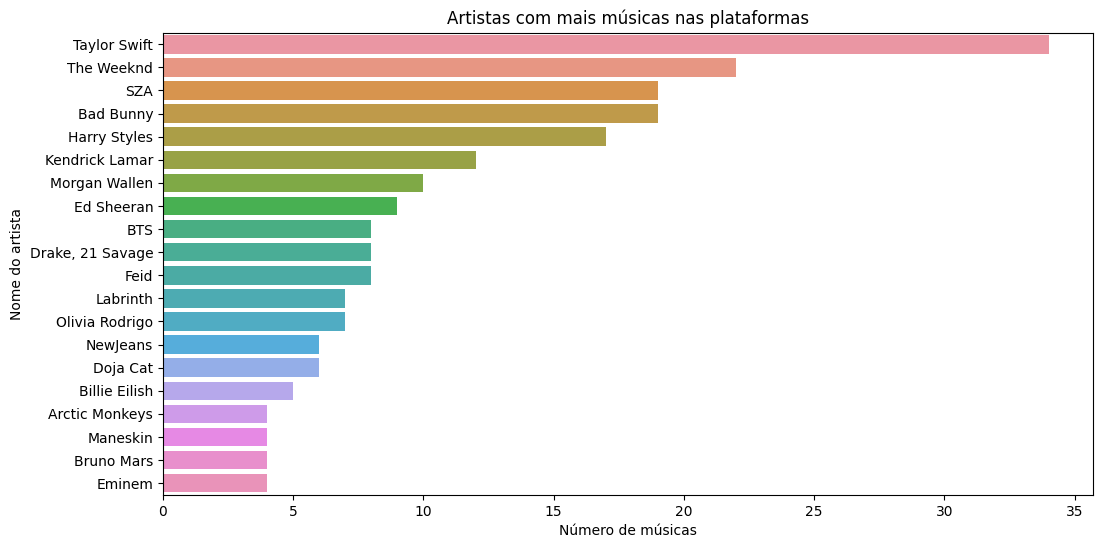

In [71]:
# Artistas com mais músicas nas plataformas
# Agrupar e contar as músicas por artista
top_artists = dados['artist(s)_name'].value_counts().head(20)

# Gráfico de barras dos 20 artistas com mais músicas
plt.figure(figsize=(12,6))
sns.countplot(data=dados[dados['artist(s)_name'].isin(top_artists.index)], y='artist(s)_name', order=top_artists.index)
plt.xlabel("Número de músicas")
plt.ylabel("Nome do artista")
plt.title("Artistas com mais músicas nas plataformas")
plt.show()

**Desempenho dos artistas nas plataformas:**

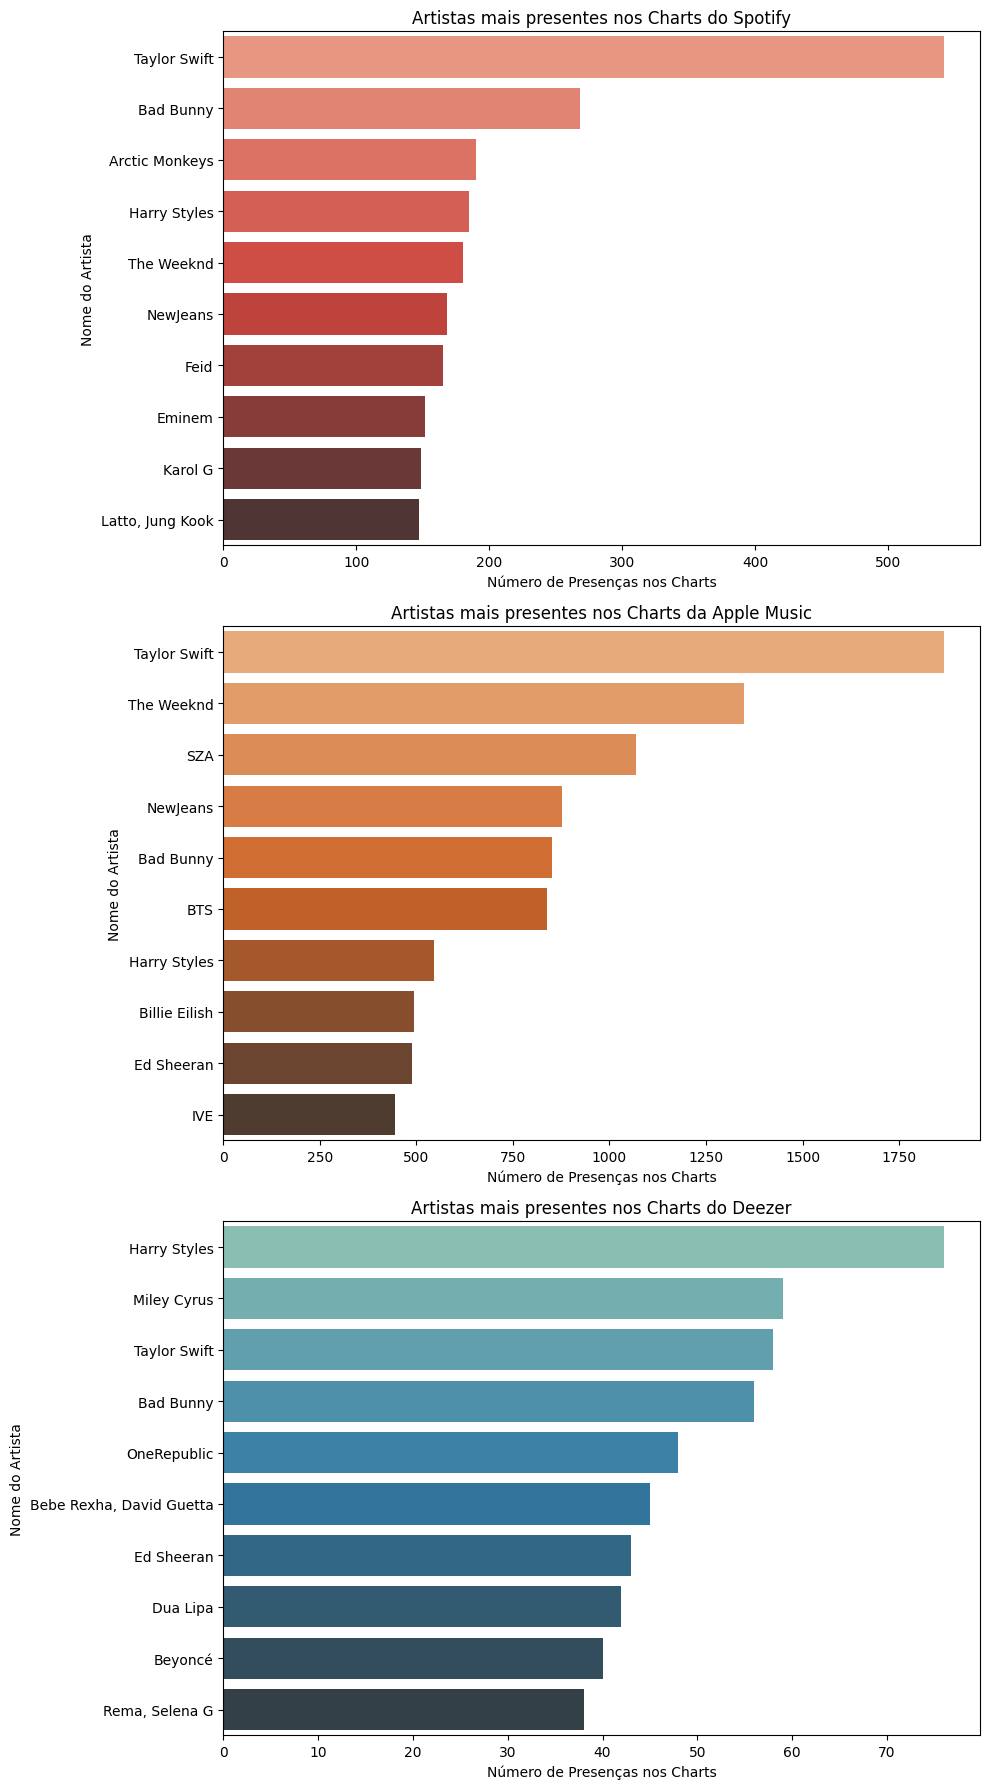

In [72]:
# Identificar os artistas mais presentes nos charts para cada plataforma
top_spotify_charts = dados.groupby('artist(s)_name')['in_spotify_charts'].sum().nlargest(10)
top_apple_charts = dados.groupby('artist(s)_name')['in_apple_charts'].sum().nlargest(10)
top_deezer_charts = dados.groupby('artist(s)_name')['in_deezer_charts'].sum().nlargest(10)

# Configurar os subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

# Gráfico Spotify Charts
sns.barplot(x=top_spotify_charts.values, y=top_spotify_charts.index, ax=axes[0], palette="Reds_d")
axes[0].set_title("Artistas mais presentes nos Charts do Spotify")
axes[0].set_xlabel("Número de Presenças nos Charts")
axes[0].set_ylabel("Nome do Artista")

# Gráfico Apple Music Charts
sns.barplot(x=top_apple_charts.values, y=top_apple_charts.index, ax=axes[1], palette="Oranges_d")
axes[1].set_title("Artistas mais presentes nos Charts da Apple Music")
axes[1].set_xlabel("Número de Presenças nos Charts")
axes[1].set_ylabel("Nome do Artista")

# Gráfico Deezer Charts
sns.barplot(x=top_deezer_charts.values, y=top_deezer_charts.index, ax=axes[2], palette="YlGnBu_d")
axes[2].set_title("Artistas mais presentes nos Charts do Deezer")
axes[2].set_xlabel("Número de Presenças nos Charts")
axes[2].set_ylabel("Nome do Artista")

plt.tight_layout()
plt.show()

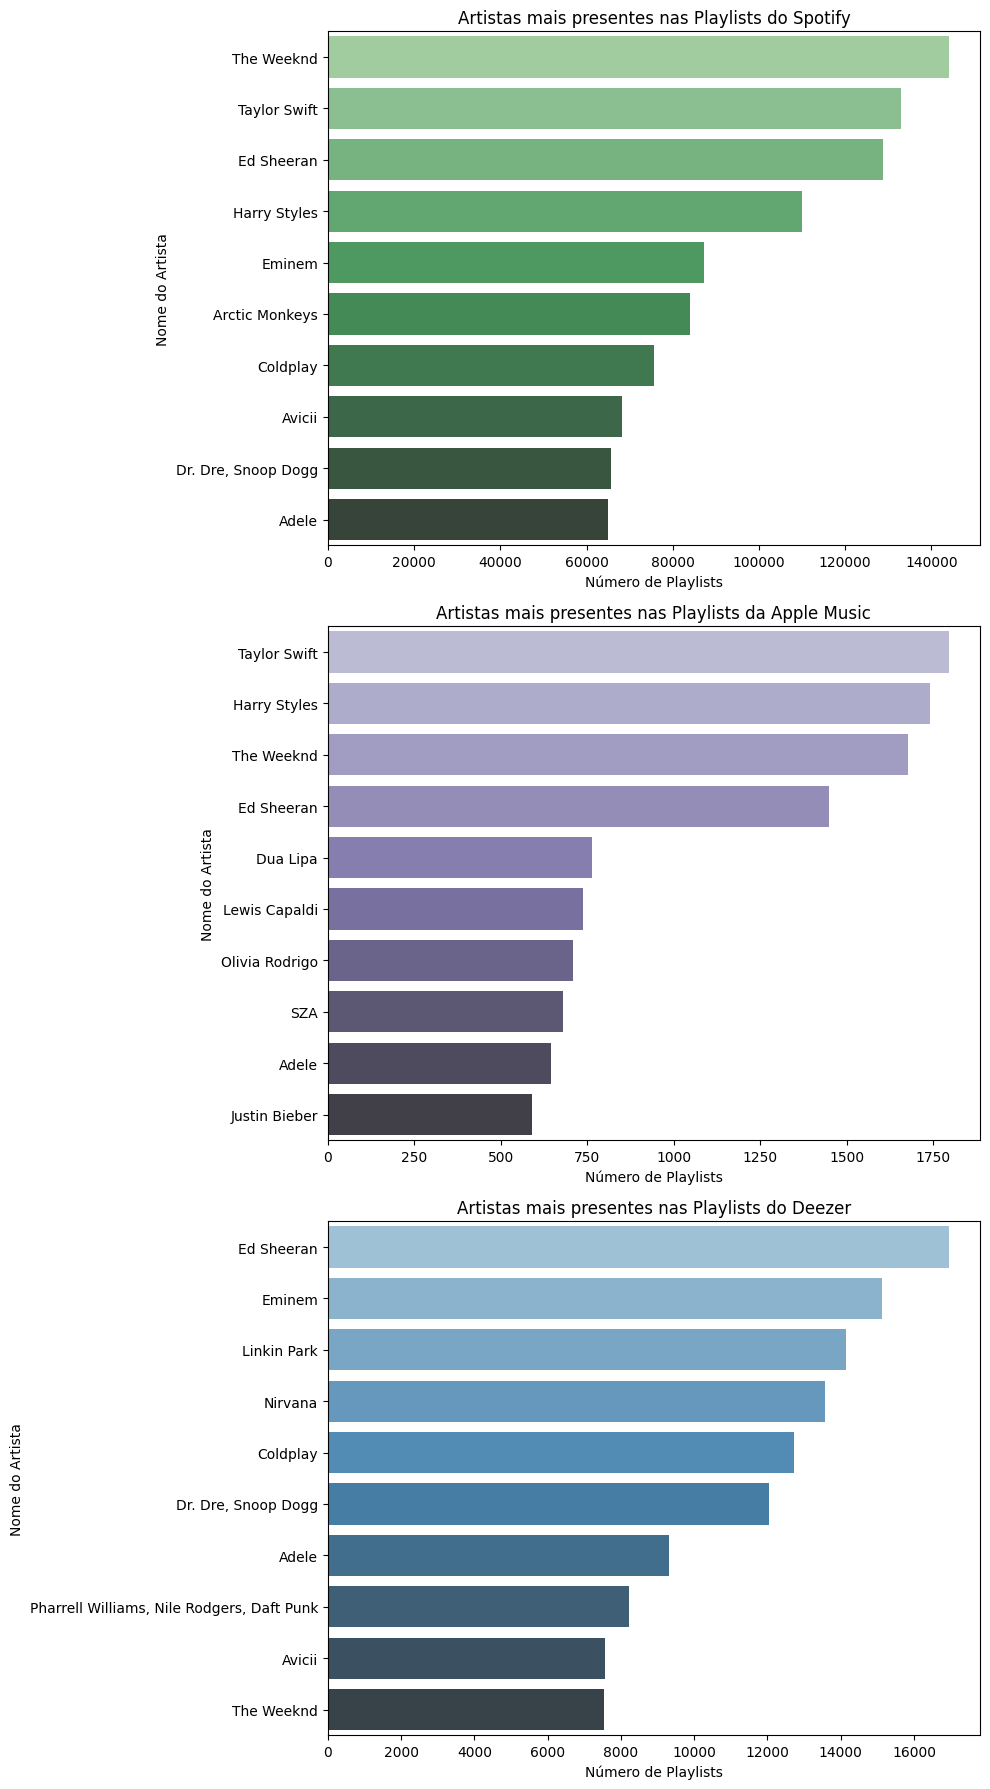

In [73]:
# Identificar os artistas mais presentes em playlists para cada plataforma
top_spotify_artists = dados.groupby('artist(s)_name')['in_spotify_playlists'].sum().nlargest(10)
top_apple_artists = dados.groupby('artist(s)_name')['in_apple_playlists'].sum().nlargest(10)
top_deezer_artists = dados.groupby('artist(s)_name')['in_deezer_playlists'].sum().nlargest(10)

# Configurar os subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

# Gráfico Spotify
sns.barplot(x=top_spotify_artists.values, y=top_spotify_artists.index, ax=axes[0], palette="Greens_d")
axes[0].set_title("Artistas mais presentes nas Playlists do Spotify")
axes[0].set_xlabel("Número de Playlists")
axes[0].set_ylabel("Nome do Artista")

# Gráfico Apple Music
sns.barplot(x=top_apple_artists.values, y=top_apple_artists.index, ax=axes[1], palette="Purples_d")
axes[1].set_title("Artistas mais presentes nas Playlists da Apple Music")
axes[1].set_xlabel("Número de Playlists")
axes[1].set_ylabel("Nome do Artista")

# Gráfico Deezer
sns.barplot(x=top_deezer_artists.values, y=top_deezer_artists.index, ax=axes[2], palette="Blues_d")
axes[2].set_title("Artistas mais presentes nas Playlists do Deezer")
axes[2].set_xlabel("Número de Playlists")
axes[2].set_ylabel("Nome do Artista")

plt.tight_layout()
plt.show()

# Mais transmissões gerais

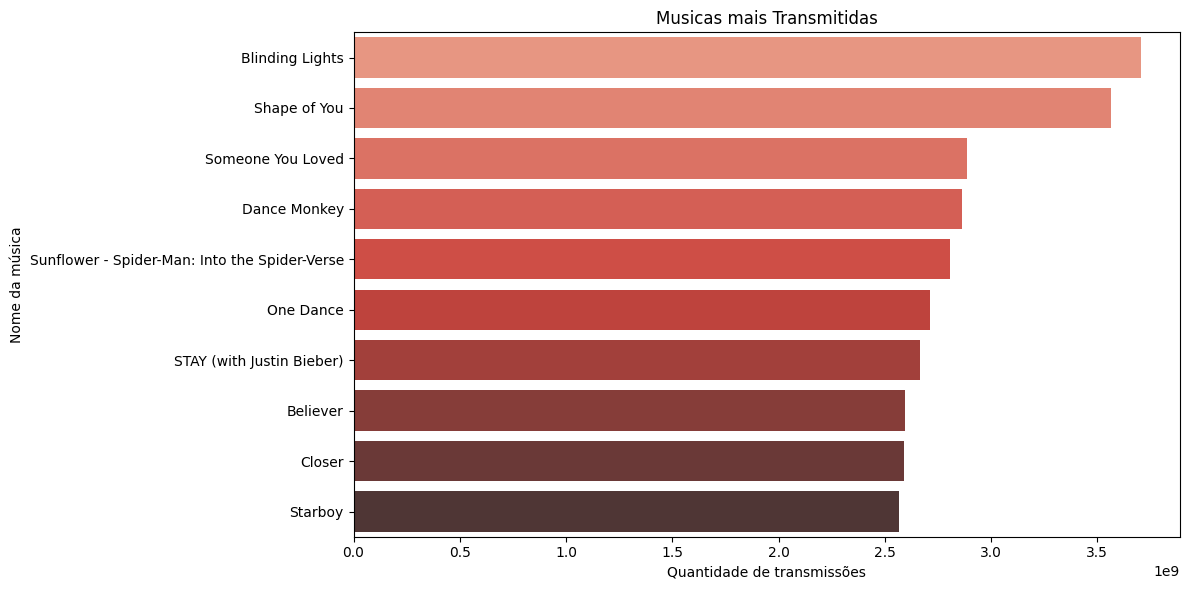

In [74]:
# Identificar as músicas com mais transmissões
most_streams = dados.groupby('track_name')['streams'].sum().nlargest(10)

# Configurar os subplots
plt.figure(figsize=(12,6))

# Gráfico de transmissões de músicas
sns.barplot(x=most_streams.values, y=most_streams.index, palette="Reds_d")
plt.title("Musicas mais Transmitidas")
plt.xlabel("Quantidade de transmissões")
plt.ylabel("Nome da música")

plt.tight_layout()
plt.show()

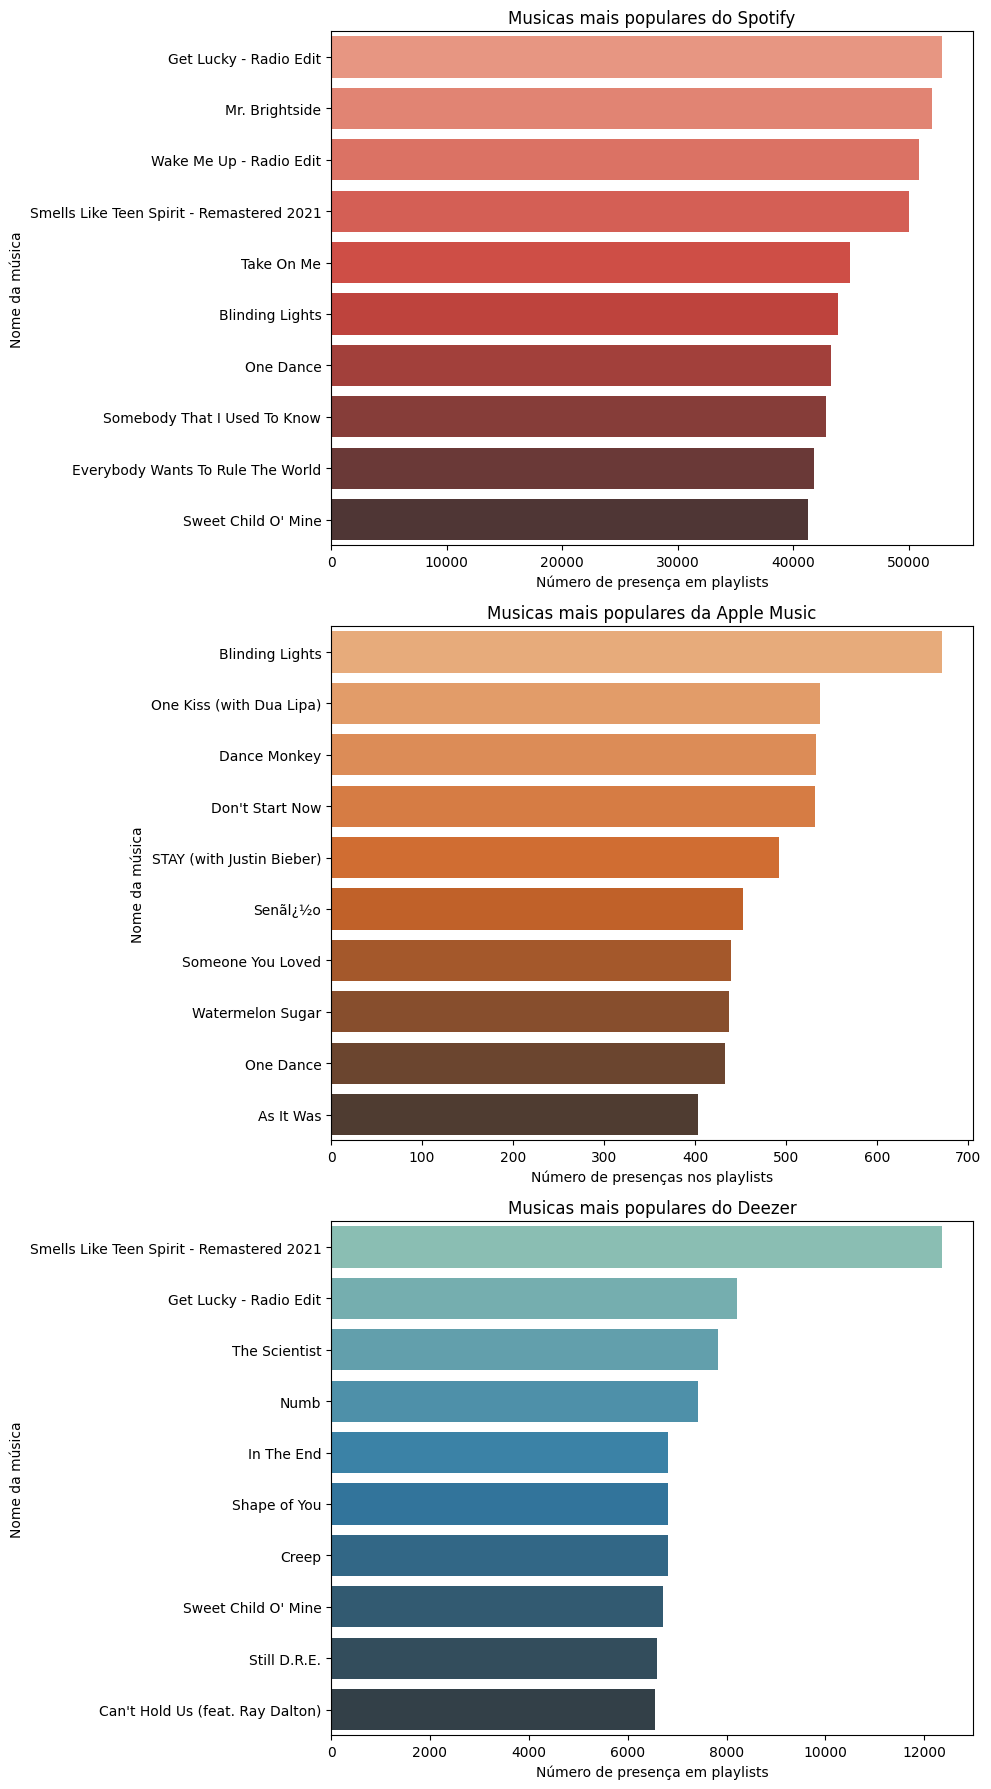

In [75]:
# Identificar as músicas mais presentes em cada plataforma
top_spotify_songs = dados.groupby('track_name')['in_spotify_playlists'].sum().nlargest(10)
top_apple_songs = dados.groupby('track_name')['in_apple_playlists'].sum().nlargest(10)
top_deezer_songs = dados.groupby('track_name')['in_deezer_playlists'].sum().nlargest(10)

# Configurar os subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18), sharex=False)

# Gráfico playlists do Spotify
sns.barplot(x=top_spotify_songs.values, y=top_spotify_songs.index, ax=axes[0], palette="Reds_d")
axes[0].set_title("Musicas mais populares do Spotify")
axes[0].set_xlabel("Número de presença em playlists")
axes[0].set_ylabel("Nome da música")

# Gráfico playlists do Apple Music
sns.barplot(x=top_apple_songs.values, y=top_apple_songs.index, ax=axes[1], palette="Oranges_d")
axes[1].set_title("Musicas mais populares da Apple Music")
axes[1].set_xlabel("Número de presenças nos playlists")
axes[1].set_ylabel("Nome da música")

# Gráfico playlists do Deezer
sns.barplot(x=top_deezer_songs.values, y=top_deezer_songs.index, ax=axes[2], palette="YlGnBu_d")
axes[2].set_title("Musicas mais populares do Deezer")
axes[2].set_xlabel("Número de presença em playlists")
axes[2].set_ylabel("Nome da música")

plt.tight_layout()
plt.show()

In [76]:
# Comparar desempenho das músicas lançadas em 2023 com as músicas lançadas em outros anos

# Matriz de Correlação

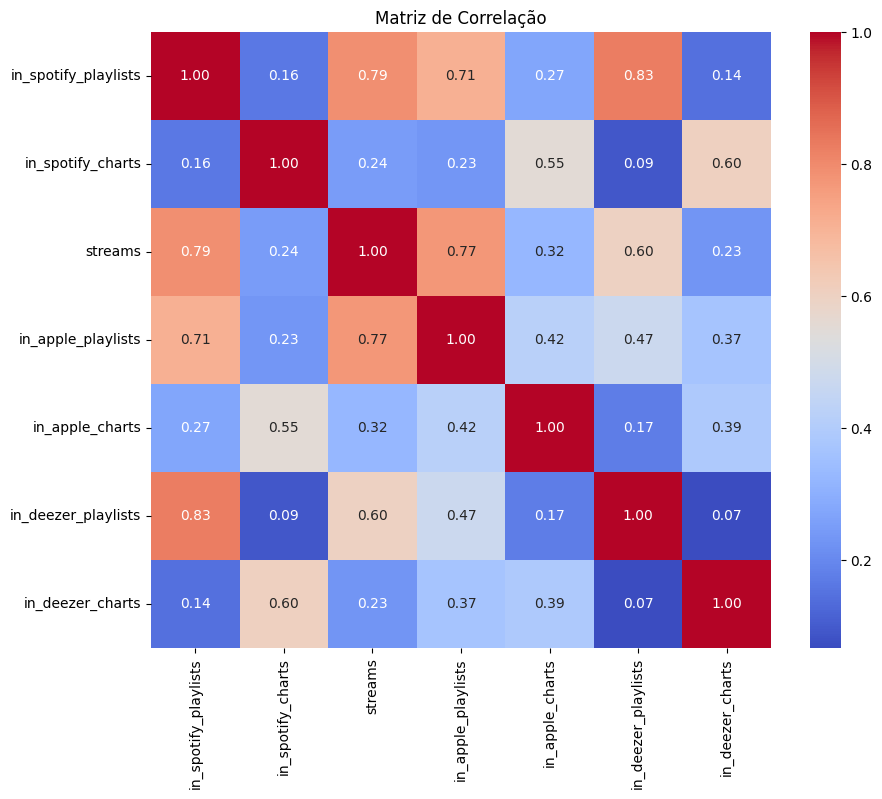

In [77]:
# Selecionar as colunas para a matriz de correlação
colunas = [
    'in_spotify_playlists', 'in_spotify_charts', 'streams',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts'
]

# Criar um DataFrame com apenas as colunas selecionadas
dados_numericos = dados[colunas]

# Calcular a matriz
matriz = dados_numericos.corr()

# Exibir a matriz (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [78]:
# Correlações entre as variáveis

# Modelos

# Regressão Logística

In [79]:
# Regressão Logística

# Definir o limiar de popularidade
limiar_popularidade = dados['streams'].median()

# Criar a variável binária 'popularidade' (1 para alta, 0 para baixa)
dados['popularidade'] = (dados['streams'] > limiar_popularidade).astype(int)

# Agrupar por nome do artista e calcular a média das variáveis relacionadas
artistas_populares = dados.groupby('artist(s)_name').agg({
    'streams': 'sum',  # Soma dos streams para o artista
    'in_spotify_playlists': 'mean',  # Média de playlists no Spotify
    'in_apple_playlists': 'mean',  # Média de playlists no Apple Music
    'in_deezer_playlists': 'mean',  # Média de playlists no Deezer
}).reset_index()

In [80]:
# Variáveis preditoras
X = artistas_populares[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]

# Variável alvo
y = (artistas_populares['streams'] > limiar_popularidade).astype(int)


# Dividir em treino e teste (80% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de regressão logística
modelo_logistico = LogisticRegression()

# Treinar o modelo
modelo_logistico.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Fazer previsões
y_pred = modelo_logistico.predict(X_test)

# Avaliar a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia: {acuracia:.2f}')

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.80
Matriz de Confusão:
[[77 15]
 [23 75]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        92
           1       0.83      0.77      0.80        98

    accuracy                           0.80       190
   macro avg       0.80      0.80      0.80       190
weighted avg       0.80      0.80      0.80       190



- A regressão logística está determinando a popularidade dos artistas, e para isso foi criado uma nova coluna "populares". É calculado uma média e aqueles que estão "acima" disso, são classificados como populares.

- Variáveis preditoras e variável algo

- Divisão de treino e teste

- Cria o modelo

- Treina o modelo

- Avalia o modelo (métricas e matriz de confusão)

# Regressão Linear

In [82]:
# Definir as variáveis preditoras e a variável alvo
X = dados[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']] # variáveis preditoras
y = dados['streams'] # variável alvo

# Dividir dados em conjuntos de treino e teste
# 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo
modelo_rl = LinearRegression()

# Treinar o modelo
modelo_rl.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo_rl.predict(X_test)

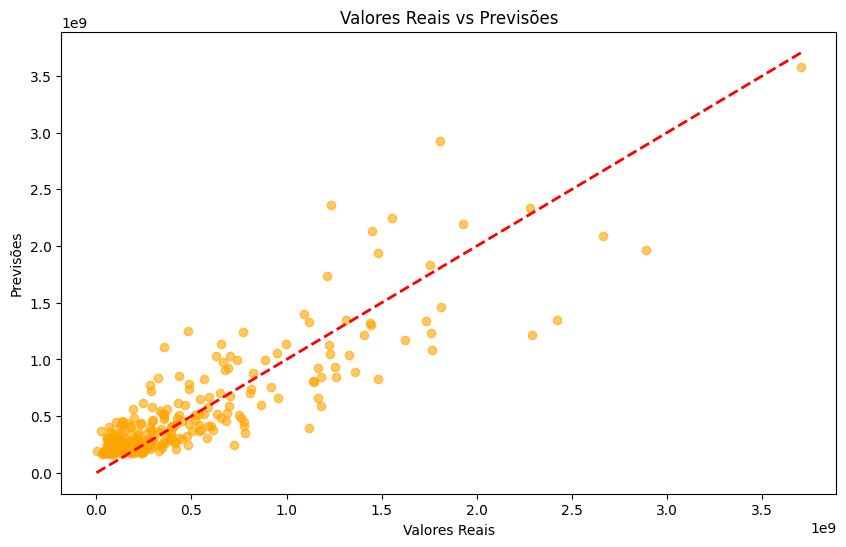

In [83]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de referência (perfeita correlação)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Valores Reais vs Previsões')
plt.show()

In [84]:
# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Absoluto Médio (MAE): 189151791.54
Erro Quadrático Médio (MSE): 72134487939108784.00
Raiz do Erro Quadrático Médio (RMSE): 268578643.86
Coeficiente de Determinação (R²): 0.75


In [85]:
score = modelo_rl.score(X_test, y_test)
score

0.7525543649408889

In [86]:
# Regressão Linear

# Definir o limiar de popularidade
limiar_popularidade_rl = dados['streams'].median()

# Criar a variável binária 'popularidade' (1 para alta, 0 para baixa)
dados['popularidade_rl'] = (dados['streams'] > limiar_popularidade).astype(int)

# Agrupar por nome do artista e calcular a média das variáveis relacionadas
artistas_populares = dados.groupby('artist(s)_name').agg({
    'streams': 'sum',  # Soma dos streams para o artista
    'in_spotify_playlists': 'mean',  # Média de playlists no Spotify
    'in_apple_playlists': 'mean',  # Média de playlists no Apple Music
    'in_deezer_playlists': 'mean',  # Média de playlists no Deezer
}).reset_index()

In [87]:
# Definir o limiar para a popularidade (pode ser a mediana das previsões de streams)
limiar_popularidade_rl = np.median(y_pred)

# Criar uma variável binária de popularidade (1 para popular, 0 para não popular)
popularidade_real_rl = (y_test > limiar_popularidade).astype(int)  # Real: popularidade verdadeira
popularidade_predita_rl = (y_pred > limiar_popularidade).astype(int)  # Predita: popularidade prevista

# Calcular a matriz de confusão
matriz_confusao_rl = confusion_matrix(popularidade_real_rl, popularidade_predita_rl)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(matriz_confusao_rl)

Matriz de Confusão:
[[108  40]
 [ 13 120]]


In [88]:
print(dados.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'popularidade',
       'popularidade_rl'],
      dtype='object')


# Árvore de Decisão

In [89]:
# Definir as variáveis preditoras e a variável alvo
X = dados[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']] # variáveis preditoras
y = dados['streams'] # variável alvo

# Dividir dados em conjuntos de treino e teste
# 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo
arvore_decisao = DecisionTreeRegressor(max_depth=4, random_state=42)

# Treinar o modelo
arvore_decisao.fit(X_train, y_train)

# Fazer predições
y_pred = arvore_decisao.predict(X_test)

In [90]:
score = arvore_decisao.score(X_test, y_test)

In [91]:
score

0.7153711267034382

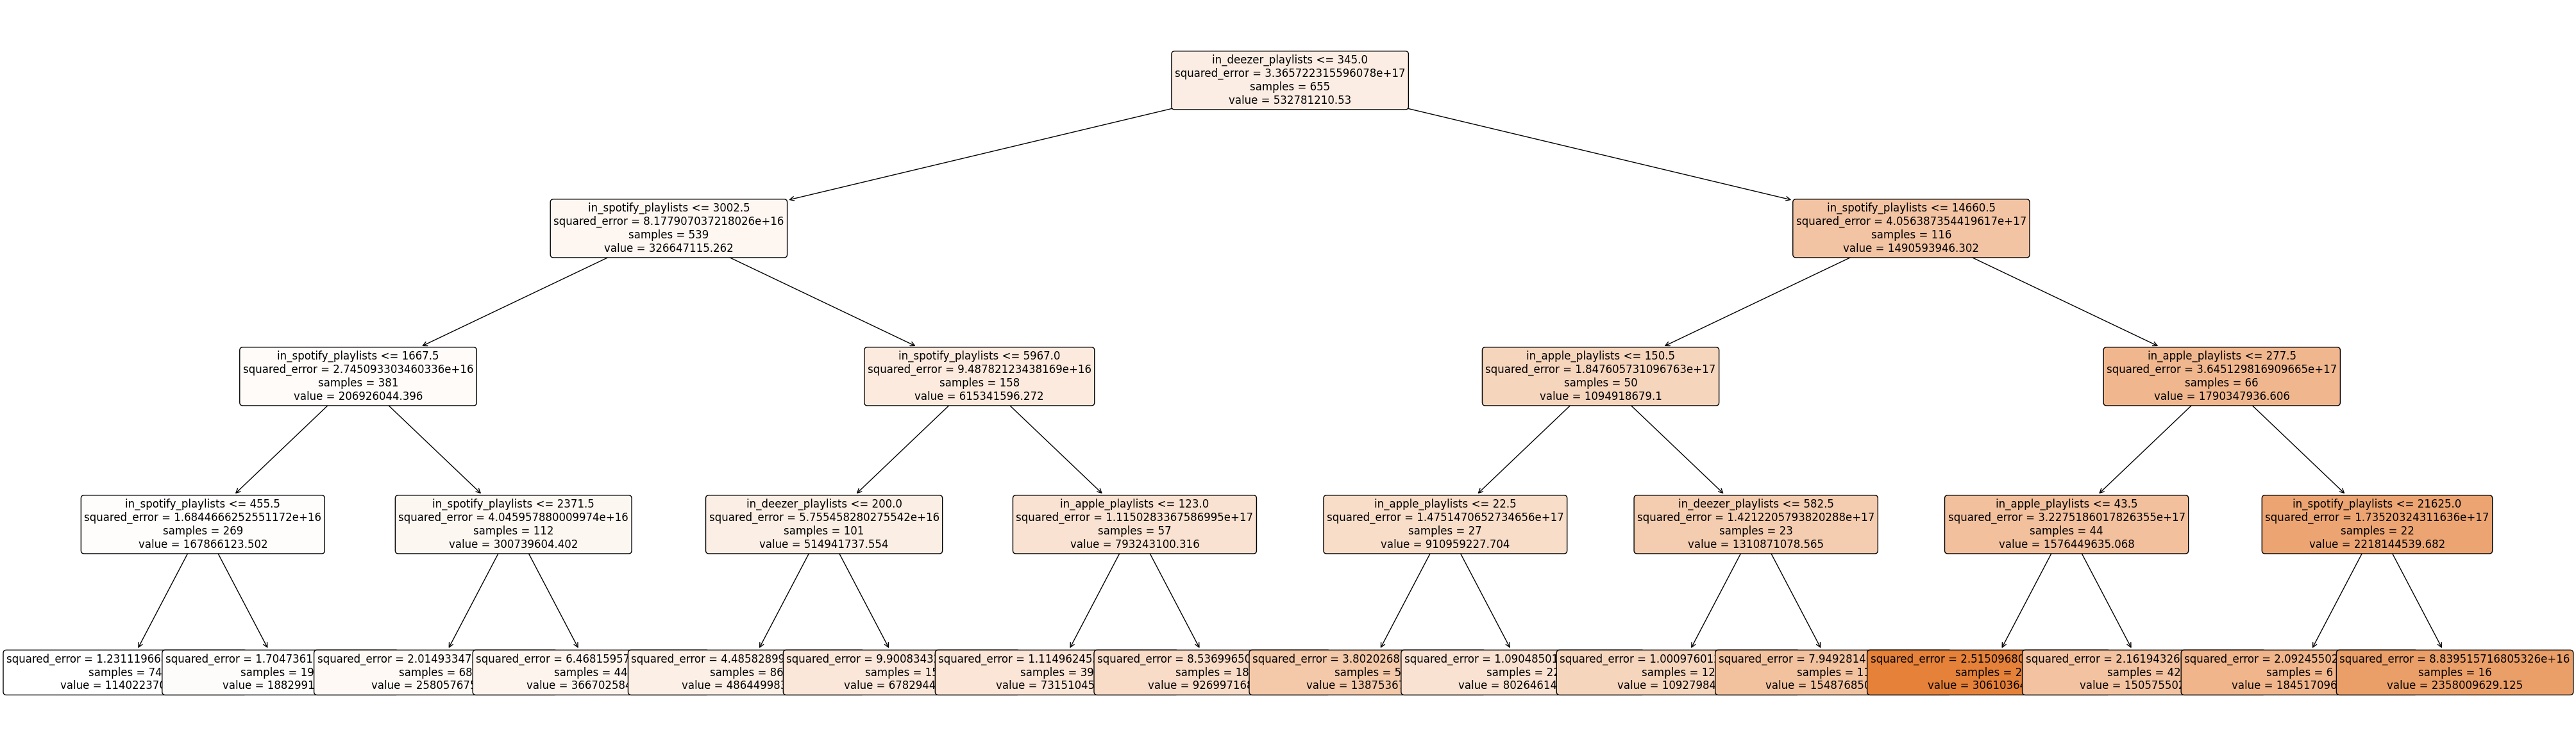

In [92]:
# Visualizar a árvore de decisão
plt.figure(figsize=(50, 15))
plot_tree(arvore_decisao, filled=True, feature_names=X.columns, rounded=True, fontsize=12)

for text in plt.gca().texts:
    text.set_color('black')  # Alterar cor para melhor visualização

plt.show()

# KNN

In [93]:
# Definir as variáveis preditoras e a variável alvo
X = dados.loc[: , ['in_spotify_playlists', 'in_deezer_playlists']]  # Variáveis preditoras 
y = dados.loc[: , 'popularidade'].values  # Variável alvo 

# Dividir dados em conjuntos de treino e teste
# 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo
knn = KNeighborsClassifier(n_neighbors= 5)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

In [94]:
X.shape

(936, 2)

In [95]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [96]:
# calculate classification accuracy
score = knn.score(X_test, y_test)

In [97]:
score

0.8505338078291815

# Código de tentativa de KNN

> **Definição das cores para o gráfico de decisão**
>cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])  # Cores de fundo para a região de decisão
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])        # Cores para os pontos de dados

>h = .02  # Tamanho do passo para a grade de pontos (mesh grid), controla a resolução do gráfico de decisão


> **Determina o intervalo mínimo e máximo dos dados para as duas variáveis de entrada**
 Aqui, estamos pegando o valor mínimo e máximo das variáveis 'in_spotify_playlists' e 'in_deezer_playlists'
>x_min, x_max = X_train.loc[: , 'in_spotify_playlists'].values.min() - 1, X_train.loc[: , 'in_spotify_playlists'].values.max() + 1
y_min, y_max = X_train.loc[: , 'in_deezer_playlists'].values.min() - 1, X_train.loc[: , 'in_deezer_playlists'].values.max() + 1

> Criação da grade de pontos (mesh grid) para visualização
 np.meshgrid cria uma malha de pontos em uma área específica, usando os limites definidos para as variáveis
>xx, yy = np.meshgrid(np.arange(x_min, x_max, h),   # Grade para a variável 'in_spotify_playlists'
                     np.arange(y_min, y_max, h))   # Grade para a variável 'in_deezer_playlists'


>** Realiza a predição do modelo KNN para cada ponto na grade, e gera a classe prevista para cada ponto (Z) np.c_[] é usado para combinar as coordenadas xx e yy em uma matriz 2D, que pode ser usada pelo modelo KNN**

>Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

> Reshape a previsão Z para corresponder ao formato da grade de pontos
>Z = Z.reshape(xx.shape)

> **Criação do gráfico de decisão**
>plt.figure()  # Cria uma nova figura
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='nearest')  **# Exibe o gráfico de decisão (mapeando as regiões de classificação)**

> 
**Plotando os pontos de treino no gráfico Os pontos são coloridos de acordo com os valores de y_train (rótulos de classe)**

>plt.scatter(X_train.loc[: , 'in_spotify_playlists'].values,  # **Posições no eixo X (Spotify)**
            X_train.loc[: , 'in_deezer_playlists'].values,    # **Posições no eixo Y (Deezer)**
            c=y_train,  **# Cores baseadas nos rótulos de classe**
            cmap=cmap_bold,  **# Usando a colormap definida para os pontos de dados**
            edgecolor='k',  **# Borda preta para destacar os pontos**
            s=20)            **# Tamanho dos pontos de treino**

> **Ajusta os limites do gráfico para que correspondam à grade criada anteriormente**
>plt.xlim(xx.min(), xx.max())  # Limites do eixo X (baseado na grade de pontos)
plt.ylim(yy.min(), yy.max())  # Limites do eixo Y (baseado na grade de pontos)

> **Adiciona um título ao gráfico**
>plt.title("3-Class classification (k = 5)")  # O título do gráfico descreve o problema e o parâmetro k do KNN

> **Exibe o gráfico**
>plt.show()
